### Importing the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the Raw Data 

In [2]:
raw_data = pd.read_csv('BankCustomers.csv')
raw_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [49]:
raw_data.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [5]:
raw_data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
raw_data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### There are no null or missing values 

### Correlation of Continous Variables with Target Variable

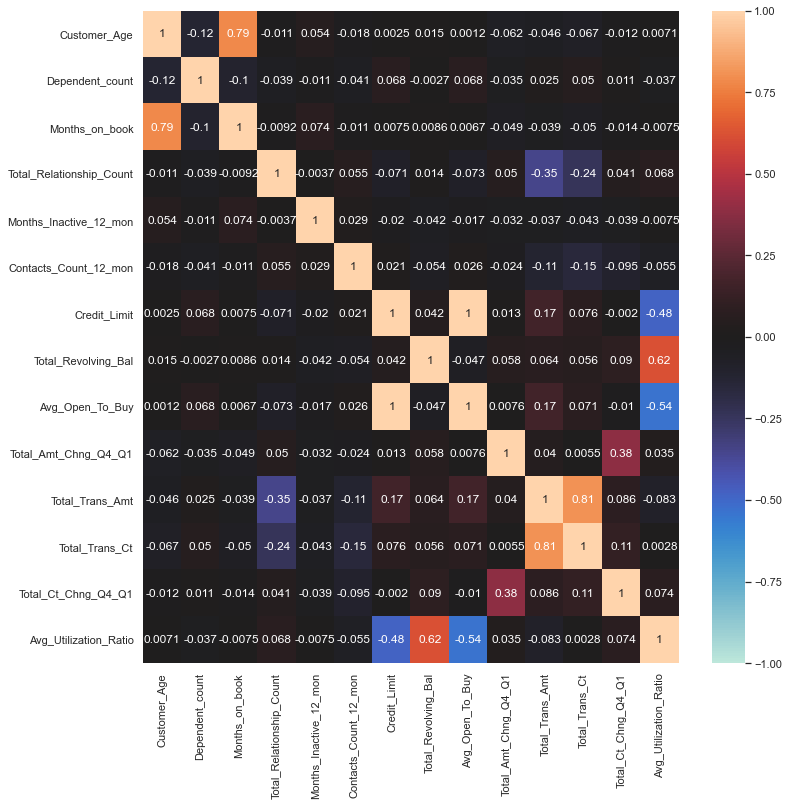

In [52]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df_numerical.corr(), annot = True,ax=ax ,vmin=-1, vmax=1, center= 0)

### Relation between Categorical Variables with Target Variables

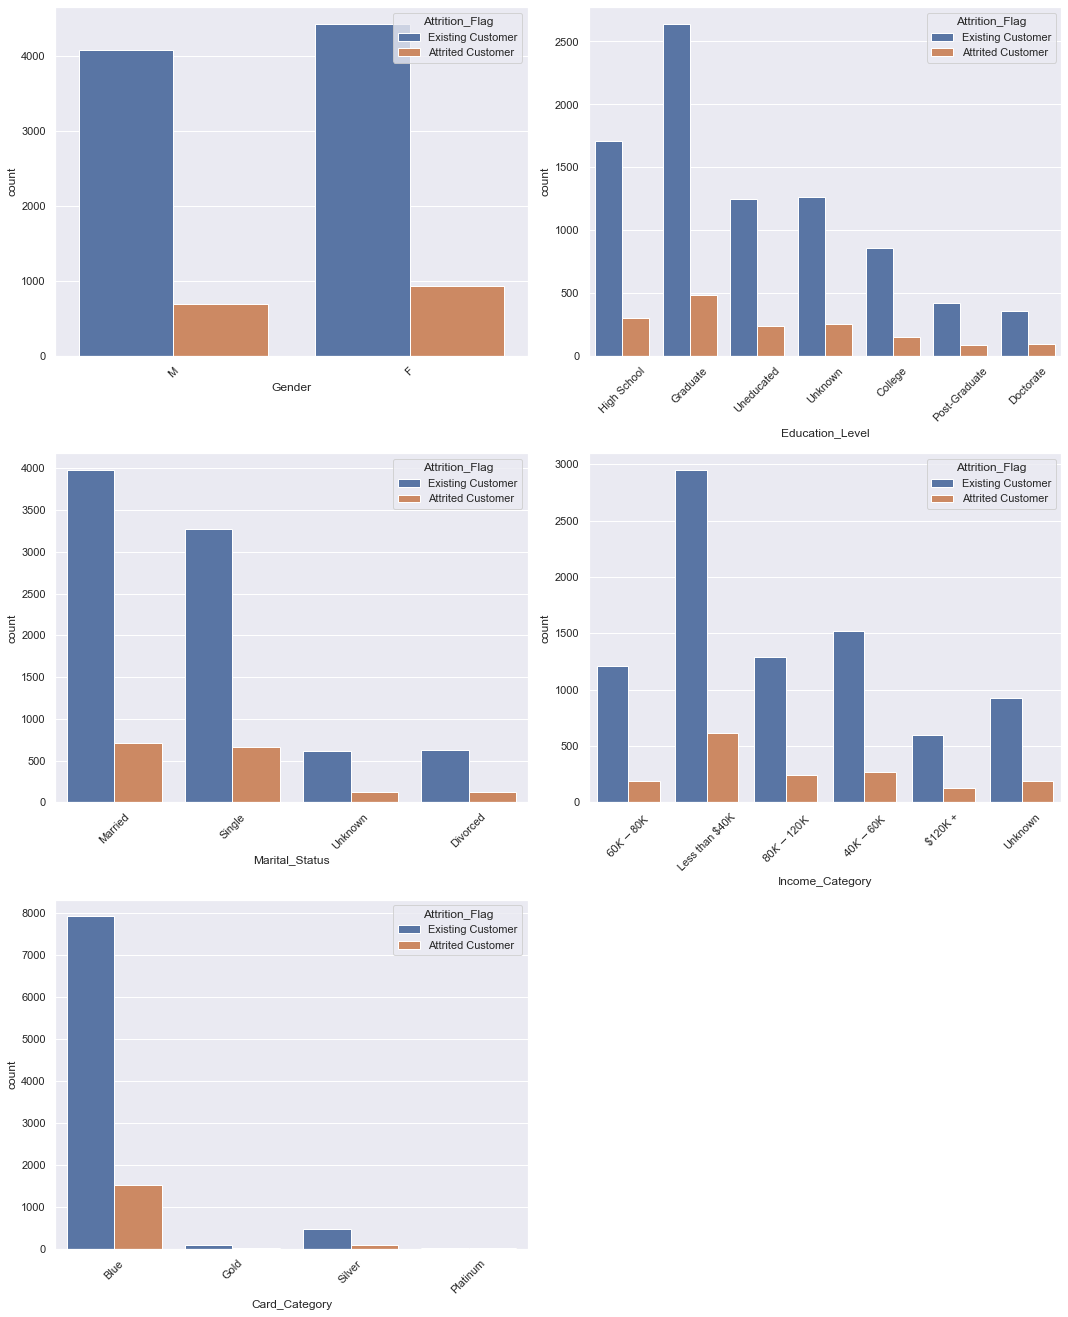

In [53]:
Categorical_features = ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']
plt.figure(figsize = (15, 30))
for i in enumerate(Categorical_features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'Attrition_Flag', data = raw_data)
    plt.xticks(rotation = 45)
    plt.tight_layout()

### Generating Ratio of Existing v/s Attrited Customers

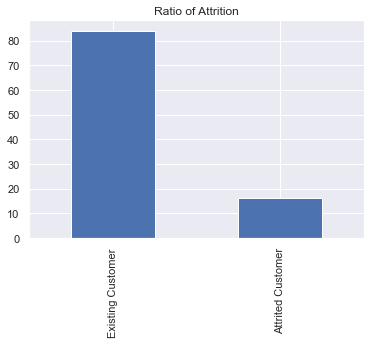

In [50]:
count= raw_data['Attrition_Flag'].value_counts(normalize=True)*100
count.plot(kind='bar')
plt.title('Ratio of Attrition')
plt.show()

### Exploring the Distributions


In [7]:
data1=raw_data
data1

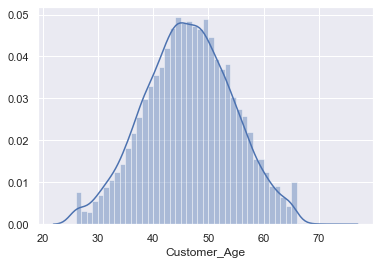

In [9]:
sns.distplot(data1['Customer_Age'])

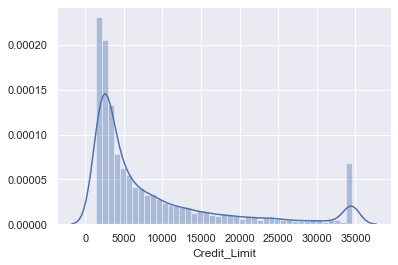

In [10]:
sns.distplot(data1['Credit_Limit'])

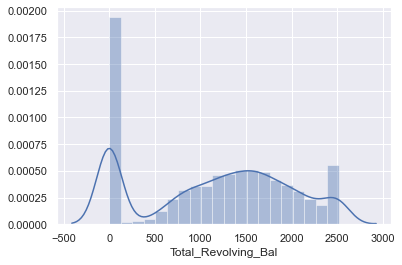

In [11]:
sns.distplot(data1['Total_Revolving_Bal'])

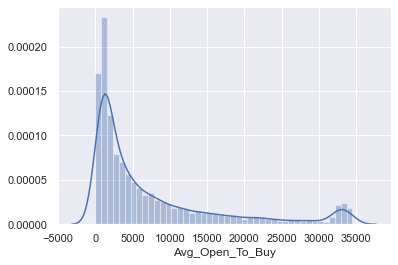

In [12]:
sns.distplot(data1['Avg_Open_To_Buy'])

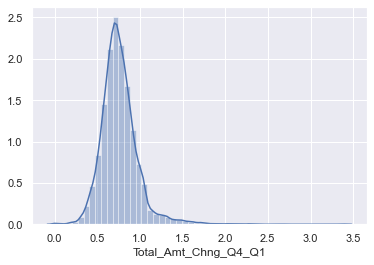

In [13]:
sns.distplot(data1['Total_Amt_Chng_Q4_Q1'])

In [14]:
data2 = data1[data1['Total_Amt_Chng_Q4_Q1']<2.0]

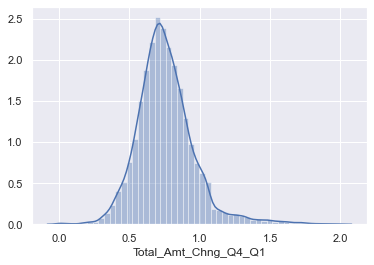

In [15]:
sns.distplot(data2['Total_Amt_Chng_Q4_Q1'])

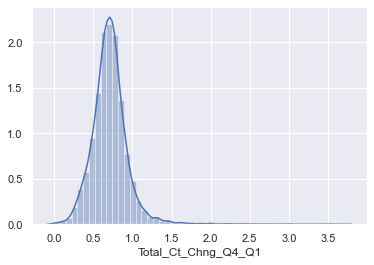

In [16]:
sns.distplot(data2['Total_Ct_Chng_Q4_Q1'])

In [17]:
data3 = data2[data2['Total_Ct_Chng_Q4_Q1']<2.0]

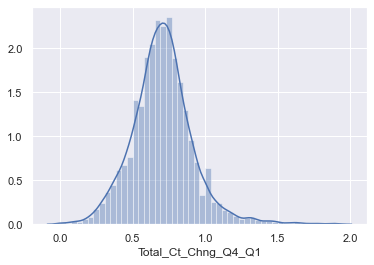

In [18]:
sns.distplot(data3['Total_Ct_Chng_Q4_Q1'])

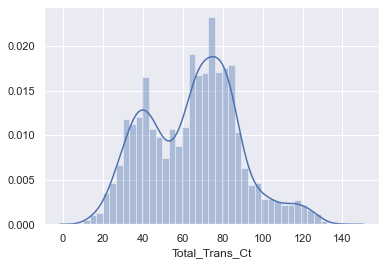

In [19]:
sns.distplot(data3['Total_Trans_Ct'])

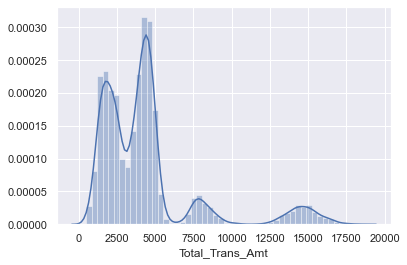

In [20]:
sns.distplot(data3['Total_Trans_Amt'])

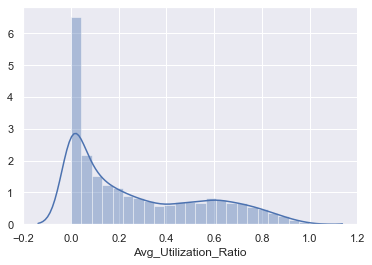

In [21]:
sns.distplot(data3['Avg_Utilization_Ratio'])

In [22]:
clean_data = data3.reset_index(drop=True)

In [24]:
clean_data.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.007700e+04,10077,10077.000000,10077,10077.000000,10077,10077,10077,10077,10077.000000,...,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8452,NaN,5340,NaN,3111,4655,3551,9391,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391449e+08,NaN,46.319936,NaN,2.345837,NaN,NaN,NaN,NaN,35.921207,...,2.342265,2.457577,8619.709715,1161.203037,7458.506679,0.755618,4418.129304,65.037908,0.705727,0.274707
std,3.688281e+07,NaN,8.014517,NaN,1.298217,NaN,NaN,NaN,NaN,7.986326,...,1.010393,1.105542,9081.644042,814.966844,9083.934835,0.205329,3399.534777,23.384495,0.213397,0.275626
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130310e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,330.000000,1329.000000,0.630000,2171.000000,45.000000,0.581000,0.022000
50%,7.179168e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4546.000000,1274.000000,3469.000000,0.736000,3910.000000,67.000000,0.700000,0.176000
75%,7.730186e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11012.000000,1782.000000,9827.000000,0.857000,4747.000000,81.000000,0.816000,0.502000


### Creating Dummy variables 

In [25]:
df_category=clean_data[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

In [26]:
df_category.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,M,Graduate,Married,$40K - $60K,Blue
2,M,Unknown,Married,$120K +,Gold
3,M,Graduate,Single,$80K - $120K,Blue
4,M,Uneducated,Unknown,$120K +,Blue


In [27]:
data_with_dummies = pd.get_dummies(df_category, drop_first=True)

In [28]:
data_with_dummies.head()

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
final_DF=pd.concat([raw_data,data_with_dummies], axis=1)

In [30]:
final_DF.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
final_DF=final_DF.drop(['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','CLIENTNUM'], axis=1)

In [32]:
df_numerical= raw_data[['Customer_Age', 'Attrition_Flag','Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [33]:
df_numerical.head()

,Customer_Age,Attrition_Flag,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,Existing Customer,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,Existing Customer,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,Existing Customer,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,Existing Customer,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,Existing Customer,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [34]:
df_numerical.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


In [38]:
final_DF.isna().sum()

Attrition_Flag                     0
Customer_Age                       0
Dependent_count                    0
Months_on_book                     0
Total_Relationship_Count           0
Months_Inactive_12_mon             0
Contacts_Count_12_mon              0
Credit_Limit                       0
Total_Revolving_Bal                0
Avg_Open_To_Buy                    0
Total_Amt_Chng_Q4_Q1               0
Total_Trans_Amt                    0
Total_Trans_Ct                     0
Total_Ct_Chng_Q4_Q1                0
Avg_Utilization_Ratio              0
Gender_M                          50
Education_Level_Doctorate         50
Education_Level_Graduate          50
Education_Level_High School       50
Education_Level_Post-Graduate     50
Education_Level_Uneducated        50
Education_Level_Unknown           50
Marital_Status_Married            50
Marital_Status_Single             50
Marital_Status_Unknown            50
Income_Category_$40K - $60K       50
Income_Category_$60K - $80K       50
I

In [40]:
final_DF1=final_DF.dropna()

In [44]:
final_DF1

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072,Existing Customer,44,4,33,3,1,3,4552.0,1144,3408.0,0.709,14418,104,0.677,0.251,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10073,Existing Customer,51,2,40,3,3,3,3750.0,1801,1949.0,0.889,17995,116,0.657,0.480,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10074,Existing Customer,50,2,40,4,3,3,17655.0,1720,15935.0,0.706,16293,120,0.739,0.097,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10075,Existing Customer,57,2,36,5,3,2,8224.0,1239,6985.0,0.793,16319,124,0.653,0.151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Standardizing the dataset - numerical values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

final_DF1[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']] = scaler.fit_transform(final_DF1[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])

final_DF1.head()

<ipython-input-45-7581a31f2de1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_DF1[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']] = scaler.fit_transform(final_DF1[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:9

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,-0.165945,0.502733,0.384533,0.762607,-1.327285,0.495559,0.449992,-0.473249,0.492386,2.618885,-0.964171,-0.971639,3.827392,-0.777247,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Existing Customer,0.333264,2.043266,1.010775,1.405470,-1.327285,-0.409269,-0.038673,-0.366455,-0.005778,3.557352,-0.920066,-1.357023,12.584665,-0.617842,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Existing Customer,0.582869,0.502733,0.008787,0.119743,-1.327285,-2.218925,-0.571742,-1.427033,-0.443572,8.354469,-0.741246,-1.913690,6.795391,-0.998241,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Existing Customer,-0.789956,1.273000,-0.241710,-0.523120,1.639455,-1.314097,-0.583311,1.662638,-0.732423,2.937782,-0.956070,-1.913690,6.795391,1.755120,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Existing Customer,-0.789956,0.502733,-1.869940,0.762607,-1.327285,-2.218925,-0.428723,-1.427033,-0.300579,6.445645,-1.062583,-1.571126,7.495470,-0.998241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = final_DF1.drop('Attrition_Flag',axis=1)
y = final_DF1['Attrition_Flag']
# define model
model = LogisticRegression(max_iter=10000)
# define the ovr strategy


                   precision    recall  f1-score   support

Attrited Customer       0.76      0.58      0.66      1612
Existing Customer       0.92      0.97      0.94      8465

         accuracy                           0.90     10077
        macro avg       0.84      0.77      0.80     10077
     weighted avg       0.90      0.90      0.90     10077



### One v/s Rest

In [ ]:
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)
accuracy_score(y, yhat)
print(classification_report(y, yhat))

### One v/s One

In [47]:
ovr = OneVsOneClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)
accuracy_score(y, yhat)
print(classification_report(y, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.58      0.66      1612
Existing Customer       0.92      0.97      0.94      8465

         accuracy                           0.90     10077
        macro avg       0.84      0.77      0.80     10077
     weighted avg       0.90      0.90      0.90     10077



### Normal Logistic Regression

In [48]:
model.fit(X, y)
# make predictions
yhat1 = model.predict(X)
accuracy_score(y, yhat1)
print(classification_report(y, yhat1))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.58      0.66      1612
Existing Customer       0.92      0.97      0.94      8465

         accuracy                           0.90     10077
        macro avg       0.84      0.77      0.80     10077
     weighted avg       0.90      0.90      0.90     10077

